# 创建包含异常点的单变量数据集


In [7]:
import numpy as np
import matplotlib.pyplot as plt

n_samples = 100
fraction_of_outliners = 0.1
number_of_inliners = int((1 - fraction_of_outliners) * n_samples)
number_of_outliners = n_samples - number_of_inliners

normal_data = np.random.randn(number_of_inliners, 1)
mean = np.mean(normal_data)
std = np.std(normal_data)
print('Mean=(%0.2f) and Standard Deviation (%0.2f)' % (mean, std))

Mean=(-0.16) and Standard Deviation (1.04)


In [8]:
outlier_data = np.random.uniform(low=-9, high=9, size=(number_of_outliners, 1))
total_data = np.r_[normal_data, outlier_data]
print('Size of input data=(%d,%d)' % (total_data.shape))

Size of input data=(100,1)


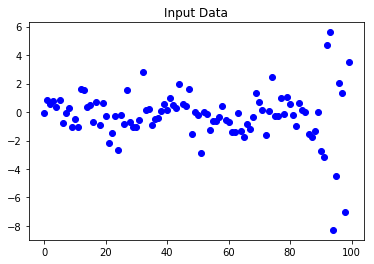

In [9]:
plt.cla()
plt.figure(1)
plt.title('Input Data')
plt.scatter(range(len(total_data)), total_data, c='b')

# 绝对中位差检查异常点

Median absolute Deviation=1.04
Outlier 4.69
Outlier 5.59
Outlier -8.27
Outlier -4.47
Outlier -7.04
Outlier 3.50


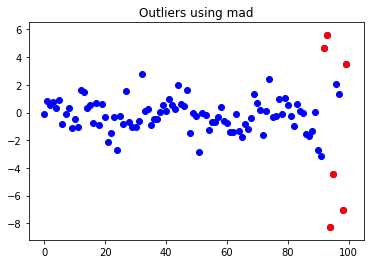

In [10]:
median = np.median(total_data)
b = np.sqrt(2)
mad = b * np.median(np.abs(total_data - median))
outliers = []
outlier_index = []
print('Median absolute Deviation=%0.2f' % (mad))
lower_limit = median - (3 * mad)
upper_limit = median + (3 * mad)
for i in range(len(total_data)):
    if total_data[i] < lower_limit or total_data[i] > upper_limit:
        print('Outlier %0.2f' % (total_data[i]))
        outliers.append(total_data[i])
        outlier_index.append(i)

plt.figure(2)
plt.title('Outliers using mad')
plt.scatter(range(len(total_data)), total_data, c='b')
plt.scatter(outlier_index, outliers, c='r')
plt.show()

# 平均值加减3倍标准差检查异常点


Outlier 5.59
Outlier -8.27
Outlier -7.04


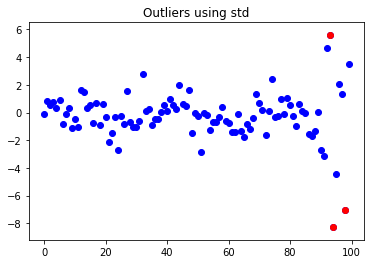

In [11]:
std = np.std(total_data)
mean = np.mean(total_data)
b = 3
outliers = []
outlier_index = []
lower_limit = mean - b * std
upper_limit = mean + b * std

for i in range(len(total_data)):
    if total_data[i] < lower_limit or total_data[i] > upper_limit:
        print('Outlier %0.2f' % (total_data[i]))
        outliers.append(total_data[i])
        outlier_index.append(i)

plt.figure(3)
plt.title('Outliers using std')
plt.scatter(range(len(total_data)), total_data, c='b')
plt.scatter(outlier_index, outliers, c='r')
plt.savefig('B04041 04 10.png')
plt.show()

# 局部异常因子(Local Outlier Factor,LOF）检测异常点


In [12]:
a = [1, 2, 12]
np.mean(a), np.median(a)

(5.0, 2.0)

In [13]:
from collections import defaultdict
import numpy as np

instances = np.matrix([[0, 0], [0, 1], [1, 0], [1, 1], [5, 0]])

In [14]:
k = 2
distance = 'manhattan'
from sklearn.metrics import pairwise_distances
dist = pairwise_distances(instances, metric=distance)

import heapq
k_distance = defaultdict(tuple)
for i in range(instances.shape[0]):
    distances = dist[i].tolist()
    ksmallest = heapq.nsmallest(k + 1, distances)[1:][k - 1]
    ksmallest_index = distances.index(ksmallest)
    k_distance[i] = (ksmallest, ksmallest_index)

In [15]:
k_distance

defaultdict(tuple,
            {0: (1.0, 1), 1: (1.0, 0), 2: (1.0, 0), 3: (1.0, 1), 4: (5.0, 0)})

In [16]:
def all_indices(value, inlist):
    out_indices = []
    idx = -1
    while True:
        try:
            idx = inlist.index(value, idx + 1)
            out_indices.append(idx)
        except ValueError:
            break
    return (out_indices)


import heapq
k_neig = defaultdict(list)
for i in range(instances.shape[0]):
    distances = dist[i].tolist()
    print('All neighbourhood of point %.2f' % (i))
    print(distances)
    ksmallest = heapq.nsmallest(k + 1, distances)[1:]
    print('K neighbourhood of point %.2f' % (i))
    print(ksmallest)
    ksmallest_set = set(ksmallest)
    ksmallest_idx = []
    for x in ksmallest_set:
        ksmallest_idx.append(all_indices(x, distances))
    ksmallest_idx = [item for sublist in ksmallest_idx for item in sublist]
    k_neig[i].extend(zip(ksmallest, ksmallest_idx))
k_neig

All neighbourhood of point 0.00
[0.0, 1.0, 1.0, 2.0, 5.0]
K neighbourhood of point 0.00
[1.0, 1.0]
All neighbourhood of point 1.00
[1.0, 0.0, 2.0, 1.0, 6.0]
K neighbourhood of point 1.00
[1.0, 1.0]
All neighbourhood of point 2.00
[1.0, 2.0, 0.0, 1.0, 4.0]
K neighbourhood of point 2.00
[1.0, 1.0]
All neighbourhood of point 3.00
[2.0, 1.0, 1.0, 0.0, 5.0]
K neighbourhood of point 3.00
[1.0, 1.0]
All neighbourhood of point 4.00
[5.0, 6.0, 4.0, 5.0, 0.0]
K neighbourhood of point 4.00
[4.0, 5.0]


defaultdict(list,
            {0: [(1.0, 1), (1.0, 2)],
             1: [(1.0, 0), (1.0, 3)],
             2: [(1.0, 0), (1.0, 3)],
             3: [(1.0, 1), (1.0, 2)],
             4: [(4.0, 2), (5.0, 0)]})

In [21]:
local_reach_density = defaultdict(float)
for i in range(instances.shape[0]):
    no_neighbours = len(k_neig[i])
    denom_sum = 0
    for neigh in k_neig[i]:
        denom_sum += max(neigh[0], k_distance[neigh[1]][0])
    local_reach_density[i] = no_neighbours / (1.0 * denom_sum)

local_reach_density

defaultdict(float, {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 0.2222222222222222})

In [23]:
lof_list = []
for i in range(instances.shape[0]):
    lrd_sum = 0
    rdist_sum = 0
    for neigh in k_neig[i]:
        lrd_sum += local_reach_density[neigh[1]]
        rdist_sum += max(neigh[0], k_distance[neigh[1]][0])
    lof_list.append((i, lrd_sum * rdist_sum))

In [24]:
lof_list

[(0, 4.0), (1, 4.0), (2, 4.0), (3, 4.0), (4, 18.0)]